<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/LSTM_and_GRU_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Layer LSTM

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# Get the data 
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised =True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCDUDQE/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCDUDQE/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCDUDQE/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features["text"].encoder

In [0]:
# Hyperparameters
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))


In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, 64), 
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(1,activation = "sigmoid")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [8]:
NUM_EPOCHS = 10

hisory1 = model.fit(train_dataset, epochs = NUM_EPOCHS,
                   validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 70s 178ms/step - loss: 0.5094 - accuracy: 0.7452 - val_loss: 0.4315 - val_accuracy: 0.8244
Epoch 2/10
391/391 [==============================] - 70s 179ms/step - loss: 0.3504 - accuracy: 0.8594 - val_loss: 0.3797 - val_accuracy: 0.8493
Epoch 3/10
391/391 [==============================] - 70s 179ms/step - loss: 0.2817 - accuracy: 0.8902 - val_loss: 0.3887 - val_accuracy: 0.8288
Epoch 4/10
391/391 [==============================] - 70s 180ms/step - loss: 0.2150 - accuracy: 0.9201 - val_loss: 0.4168 - val_accuracy: 0.8478
Epoch 5/10
391/391 [==============================] - 70s 179ms/step - loss: 0.1676 - accuracy: 0.9398 - val_loss: 0.5216 - val_accuracy: 0.8402
Epoch 6/10
391/391 [==============================] - 71s 181ms/step - loss: 0.1288 - accuracy: 0.9548 - val_loss: 0.5302 - val_accuracy: 0.8196
Epoch 7/10
391/391 [==============================] - 71s 181ms/step - loss: 0.1390 - accuracy: 0.9501 - val_loss: 0.5798 - val_ac

In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history1, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

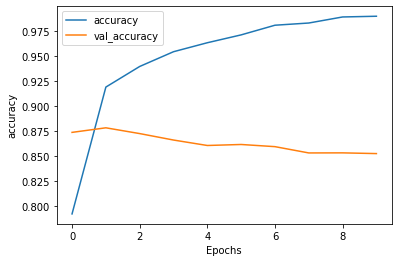

In [32]:
plot_graphs(history,"accuracy")

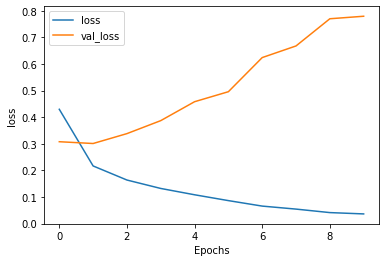

In [33]:
plot_graphs(history, "loss")

# Multiple Layer LSTM

In [0]:
tokenizer = info.features["text"].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(64, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="sigmoid")
])

In [14]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2.compile(loss = "binary_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"])

In [18]:
NUM_EPOCHS = 10
history = model_2.fit(train_dataset, epochs = NUM_EPOCHS, 
                    validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 126s 322ms/step - loss: 0.6652 - accuracy: 0.5696 - val_loss: 0.6835 - val_accuracy: 0.5329
Epoch 2/10
391/391 [==============================] - 126s 322ms/step - loss: 0.5861 - accuracy: 0.6944 - val_loss: 0.6217 - val_accuracy: 0.6558
Epoch 3/10
391/391 [==============================] - 127s 325ms/step - loss: 0.4841 - accuracy: 0.7698 - val_loss: 0.5042 - val_accuracy: 0.7790
Epoch 4/10
391/391 [==============================] - 128s 327ms/step - loss: 0.4893 - accuracy: 0.7729 - val_loss: 0.5762 - val_accuracy: 0.7299
Epoch 5/10
391/391 [==============================] - 128s 328ms/step - loss: 0.3684 - accuracy: 0.8462 - val_loss: 0.4119 - val_accuracy: 0.8317
Epoch 6/10
391/391 [==============================] - 128s 327ms/step - loss: 0.2683 - accuracy: 0.8954 - val_loss: 0.3549 - val_accuracy: 0.8512
Epoch 7/10
391/391 [==============================] - 128s 327ms/step - loss: 0.2154 - accuracy: 0.9175 - val_loss: 0.3817 -

In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

KeyError: ignored

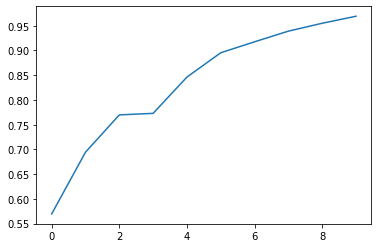

In [20]:
plot_graphs(history, "accuracy")

In [0]:
plot_graphs(history, "loss")

# Multiple Layer GRU

In [0]:
import tensorflow_datasets as tfds 
import tensorflow as tf

In [0]:
# Get the data (only if not done above)
# dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised = True)
# train_dataset, test_dataset = dataset["train"], dataset["test"]

In [0]:
tokenizer = info.features["test"].encoder 

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dateset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

In [0]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.Conv1D(128, 5, activation ="relu"),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [23]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3.compile(loss="binary_crossentropy",
                optimizer = "adam",
                metrics ="accuracy")

In [26]:
NUM_EPOCHS = 10
history = model_3.fit(train_dataset,
                    epochs =NUM_EPOCHS,
                    validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 23s 59ms/step - loss: 0.4298 - accuracy: 0.7925 - val_loss: 0.3079 - val_accuracy: 0.8738
Epoch 2/10
391/391 [==============================] - 18s 46ms/step - loss: 0.2168 - accuracy: 0.9190 - val_loss: 0.3012 - val_accuracy: 0.8784
Epoch 3/10
391/391 [==============================] - 17s 45ms/step - loss: 0.1639 - accuracy: 0.9396 - val_loss: 0.3383 - val_accuracy: 0.8726
Epoch 4/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1322 - accuracy: 0.9543 - val_loss: 0.3872 - val_accuracy: 0.8662
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 0.1085 - accuracy: 0.9633 - val_loss: 0.4583 - val_accuracy: 0.8608
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 0.0865 - accuracy: 0.9711 - val_loss: 0.4959 - val_accuracy: 0.8618
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 0.0659 - accuracy: 0.9808 - val_loss: 0.6242 - val_accuracy:

In [0]:
# Uncomment if you haven't defined the function previously
import matplotlib.pyplot as plt 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

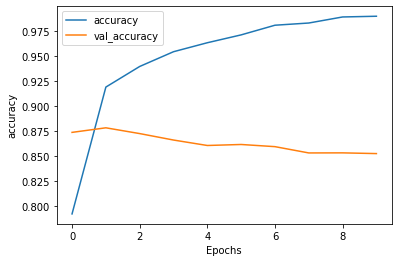

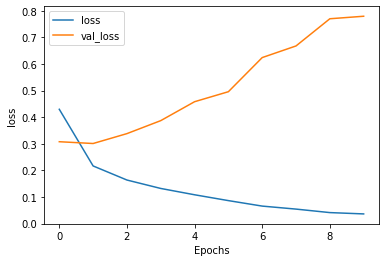

In [30]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")